In [1]:
import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
import numpy as np
import matplotlib.pyplot as plt

C:\Users\Sen\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
train = 'train'
valid = 'valid'

batch_size = 2
train_batches = ImageDataGenerator().flow_from_directory(train, 
                                                         target_size = (224,224), 
                                                         classes = ['AD','CN'], 
                                                         batch_size = batch_size)
valid_batches = ImageDataGenerator().flow_from_directory(valid, 
                                                         target_size = (224,224), 
                                                         classes = ['AD','CN'], 
                                                         batch_size = batch_size)

Found 11 images belonging to 2 classes.
Found 2 images belonging to 2 classes.


In [3]:
imgs, lables = next(train_batches)

[1. 0. 0. ... 1. 1. 1.]


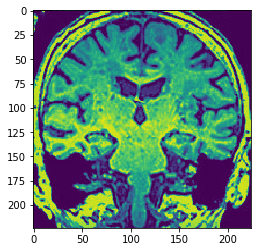

In [6]:
x = np.array([j[0] for i in imgs[0] for j in i])
print(x)
plt.imshow(x.reshape(224,224)) #, cmap = 'Greys')

In [7]:
len(imgs)

2

In [8]:
input_shape = imgs[0].shape
num_class = 2

model = Sequential()
model.add(Conv2D(32, 
                 kernel_size=(3, 3),
                 activation='relu',
                 input_shape = input_shape))

model.add(Conv2D(32, 
                 kernel_size = (3, 3), 
                 activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

model.add(Conv2D(64, 
                 kernel_size=(3, 3),
                 activation='relu'))

model.add(Conv2D(64, 
                 kernel_size = (3, 3), 
                 activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, 
                 kernel_size=(3, 3),
                 activation='relu'))

model.add(Conv2D(64, 
                 kernel_size = (3, 3), 
                 activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_class, activation='softmax'))

model.summary()

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

model.fit_generator(train_batches, 
                    steps_per_epoch = 4, 
                    validation_data = valid_batches, 
                    validation_steps = 4,
                    epochs = 2, 
                    verbose = 1)

In [9]:
vgg16_model = keras.applications.vgg16.VGG16()

vgg16_model.summary()
type(vgg16_model)

In [10]:
model1 = Sequential()
for layer in vgg16_model.layers[:-1]:
    model1.add(layer)

In [11]:
model1.summary()
type(model1)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)       295168    
__________

keras.engine.sequential.Sequential

In [12]:
for layer in model1.layers:
    layer.trainable = True

In [13]:
model1.add(Dense(2,activation = 'softmax'))
model1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)       295168    
__________

In [14]:
model1.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.adam(),
              metrics=['accuracy'])

In [15]:
model1.fit_generator(train_batches, 
                    steps_per_epoch = 2, 
                    validation_data = valid_batches, 
                    validation_steps = 1,
                    epochs = 10, 
                    verbose = 1)

Epoch 1/10
2/2 [==============================] - 6s 3s/step - loss: 4.5319 - acc: 0.7222 - val_loss: 8.0590 - val_acc: 0.5000
Epoch 2/10
2/2 [==============================] - 1s 253ms/step - loss: 8.0590 - acc: 0.5000 - val_loss: 8.0590 - val_acc: 0.5000
Epoch 3/10
2/2 [==============================] - 1s 252ms/step - loss: 8.0590 - acc: 0.5000 - val_loss: 8.0590 - val_acc: 0.5000
Epoch 4/10
2/2 [==============================] - 1s 252ms/step - loss: 4.0295 - acc: 0.7500 - val_loss: 8.0590 - val_acc: 0.5000
Epoch 5/10
2/2 [==============================] - 1s 252ms/step - loss: 8.0590 - acc: 0.5000 - val_loss: 8.0590 - val_acc: 0.5000
Epoch 6/10
2/2 [==============================] - 0s 242ms/step - loss: 11.6408 - acc: 0.2778 - val_loss: 8.0590 - val_acc: 0.5000
Epoch 7/10
2/2 [==============================] - 1s 253ms/step - loss: 4.0295 - acc: 0.7500 - val_loss: 8.0590 - val_acc: 0.5000
Epoch 8/10
2/2 [==============================] - 1s 253ms/step - loss: 8.0590 - acc: 0.5000